In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np 
%matplotlib inline 

In [2]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [3]:
X.shape

(1000, 2)

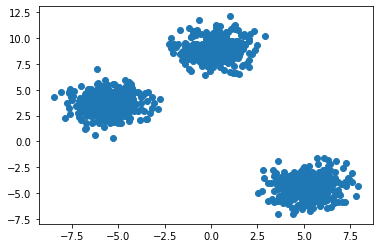

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [8]:
from sklearn.cluster import KMeans
# Elbow Method 
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

print(wcss)

c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[34827.57682552022, 7935.4372861454185, 1319.2730531585607, 1140.4677884655127, 992.0624178531959, 868.9224269282606, 754.601213498142, 666.126212547712, 579.7405934318311, 534.414669524151]


In [9]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 992.0624178531959,
 868.9224269282606,
 754.601213498142,
 666.126212547712,
 579.7405934318311,
 534.414669524151]

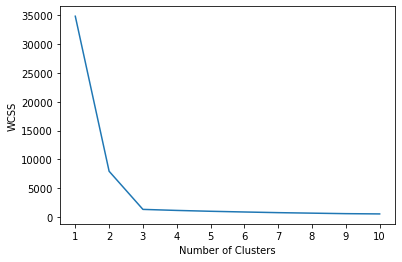

In [10]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_labels = kmeans.fit_predict(X_train)

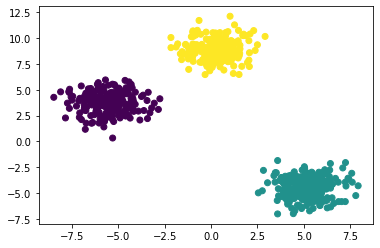

In [16]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

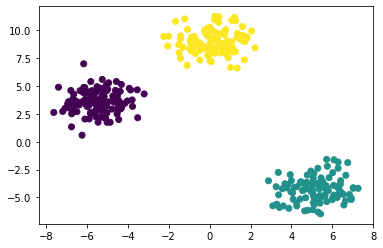

In [17]:
y_test_labels = kmeans.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [19]:
# knee locator to automate
!pip install kneed

In [20]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve='convex',direction='decreasing')
kl.elbow

3

In [21]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_scores.append(score)



In [22]:
silhouette_scores

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33727775723886533,
 0.3457229556493886,
 0.3364317323152281,
 0.34564153772113987,
 0.3422417865964022]

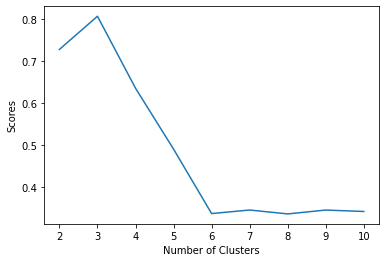

In [23]:
plt.plot(range(2,11),silhouette_scores)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Scores")
plt.show()